In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from glob import glob
from tqdm import tqdm


In [23]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

# 데이터셋 설명에 따르면, 실제 테스트 데이터는 훈련 데이터와의 이미자와 상당히 유사다하고 합니다.
train_jpg = glob('./train/' + '*.jpg')
test_jpg = glob('./test/' + '*.jpg')

print('train_df : ', train_df.shape, 'test_df : ', test_df.shape, 'train_jpg : ', len(train_jpg))

train_df :  (9912, 14) test_df :  (8, 13) train_jpg :  9912


In [25]:
train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


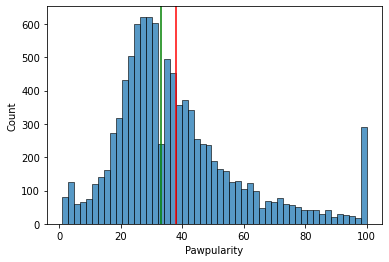

In [26]:
sns.histplot(train_df['Pawpularity'])

# 평균은 데이터를 모두 더한 후 데이터의 개수로 나눈 값을 의미합니다.
plt.axvline(train_df['Pawpularity'].mean(), color = 'red')
# 전체 데이터 중 가운데에 있는 수를 의미합니다.
plt.axvline(train_df['Pawpularity'].median(), color = 'green')

In [27]:
train_df[['Pawpularity']].describe().T

,count,mean,std,min,25%,50%,75%,max
Pawpularity,9912.0,38.039044,20.59199,1.0,25.0,33.0,46.0,100.0


In [28]:
train_df.columns
# Each pet photo is labeled with value of 1 or 0 for each of the following features

Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur',
       'Pawpularity'],
      dtype='object')

In [39]:
# Subject Focus - Pet stands out against uncluttered background, not too close / far.
# Eyes - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.
# Face - Decently clear face, facing front or near-front.
# Near - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).
# Action - Pet in the middle of an action (e.g., jumping).
# Accessory - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.
# Group - More than 1 pet in the photo.
# Collage - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).
# Human - Human in the photo.
# Occlusion - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered occlusion.

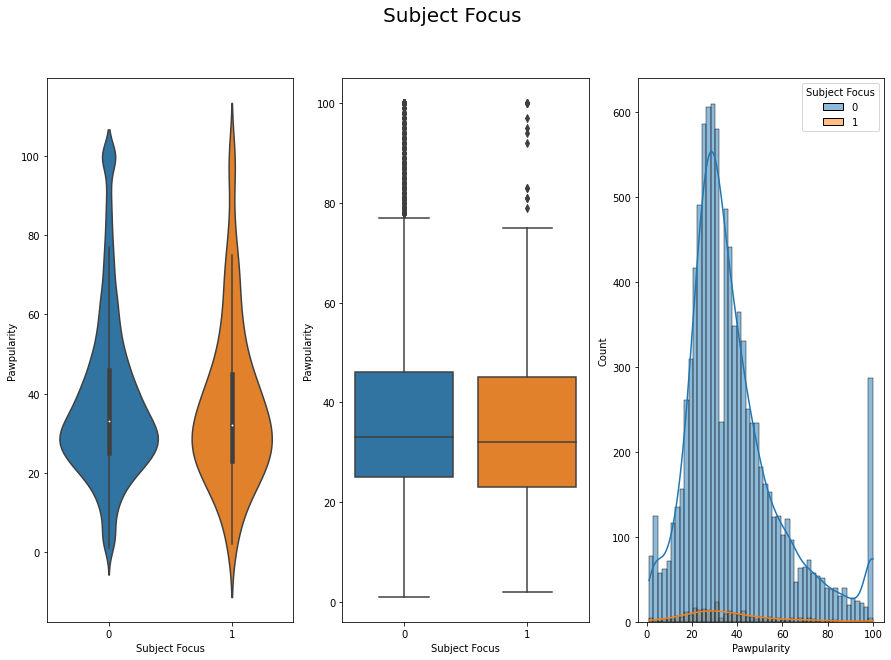

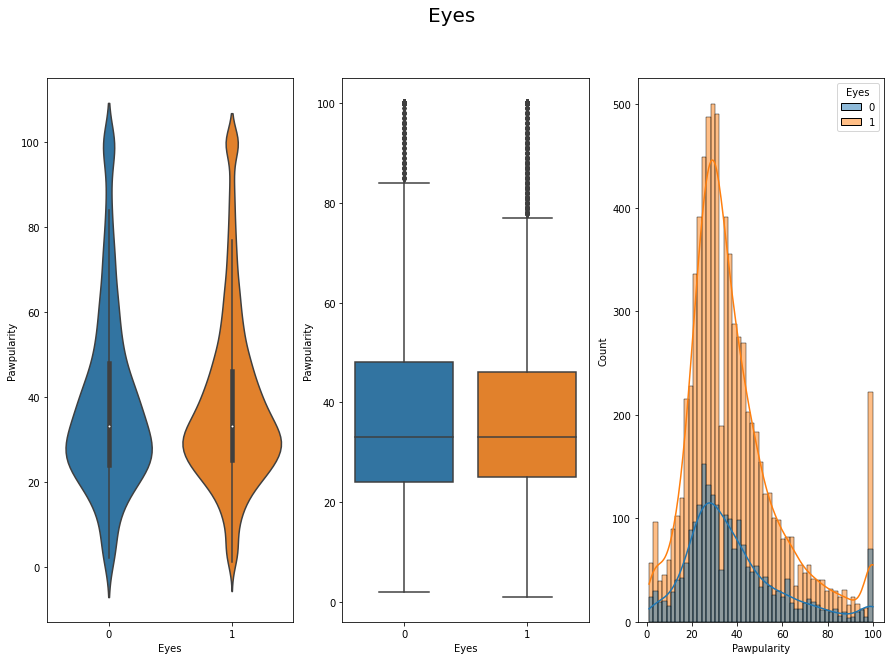

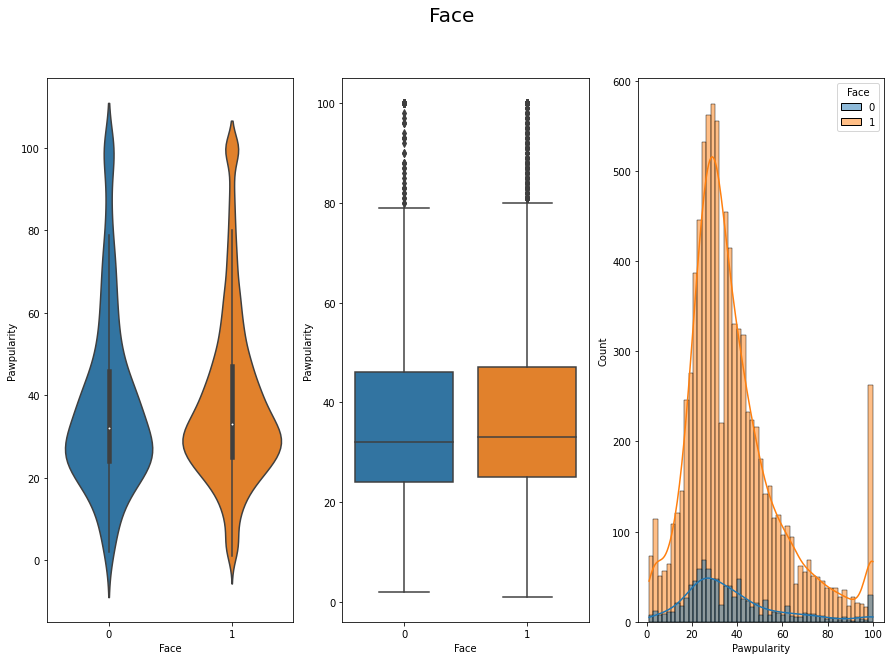

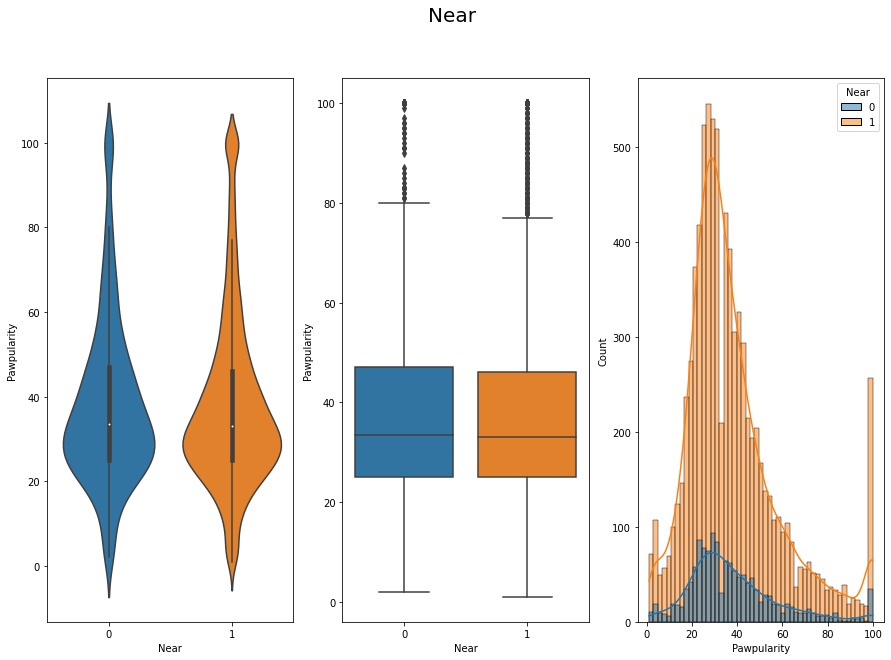

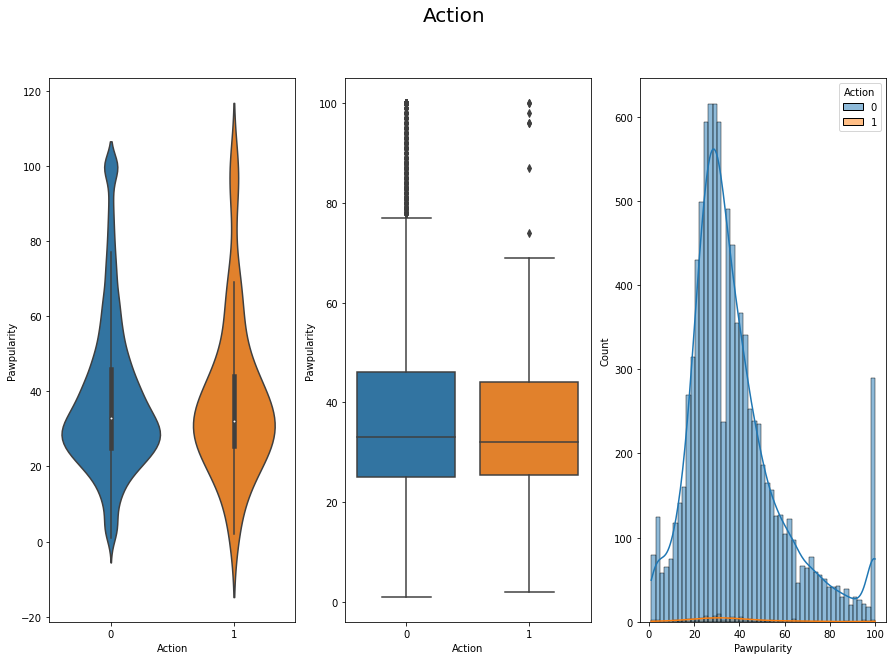

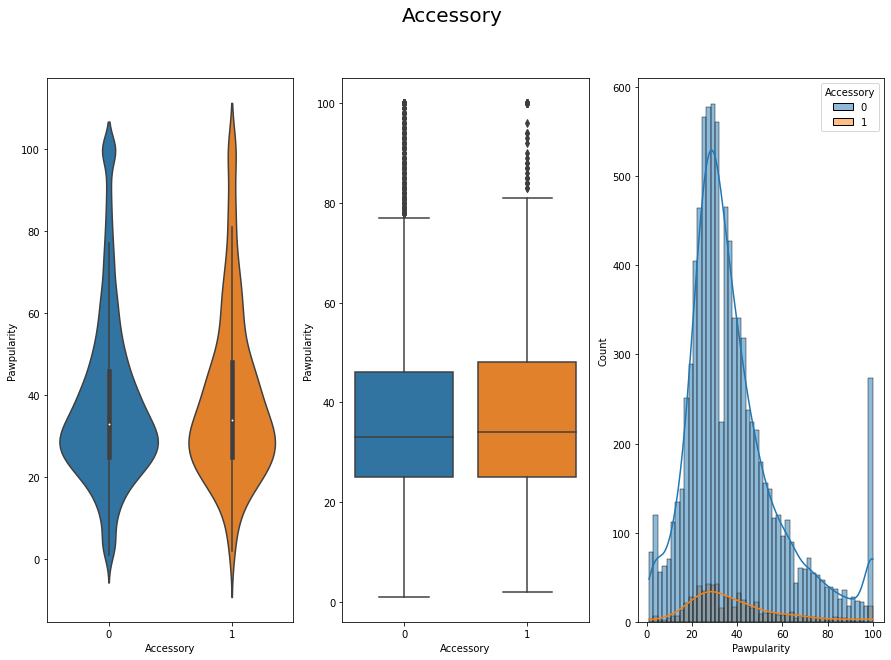

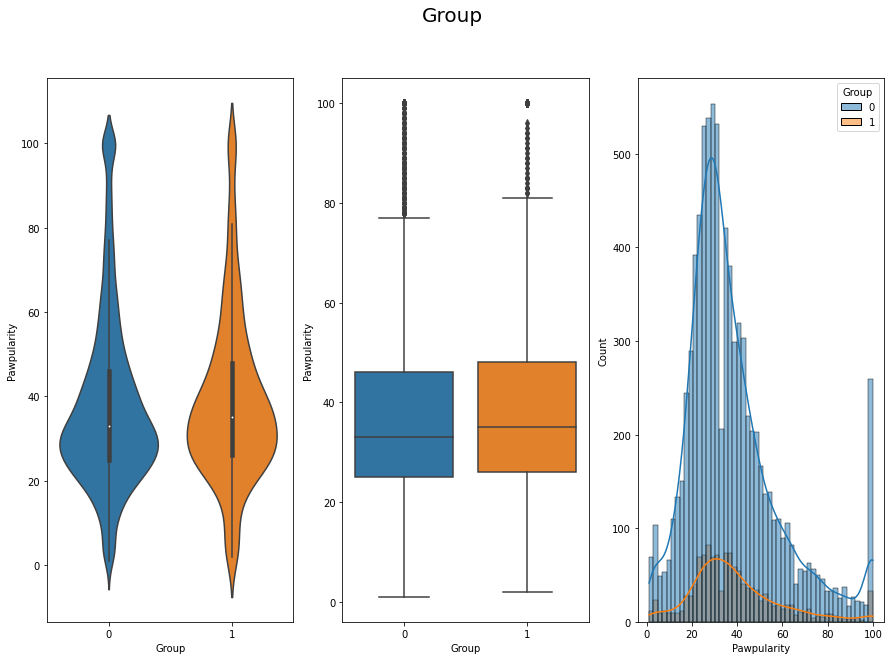

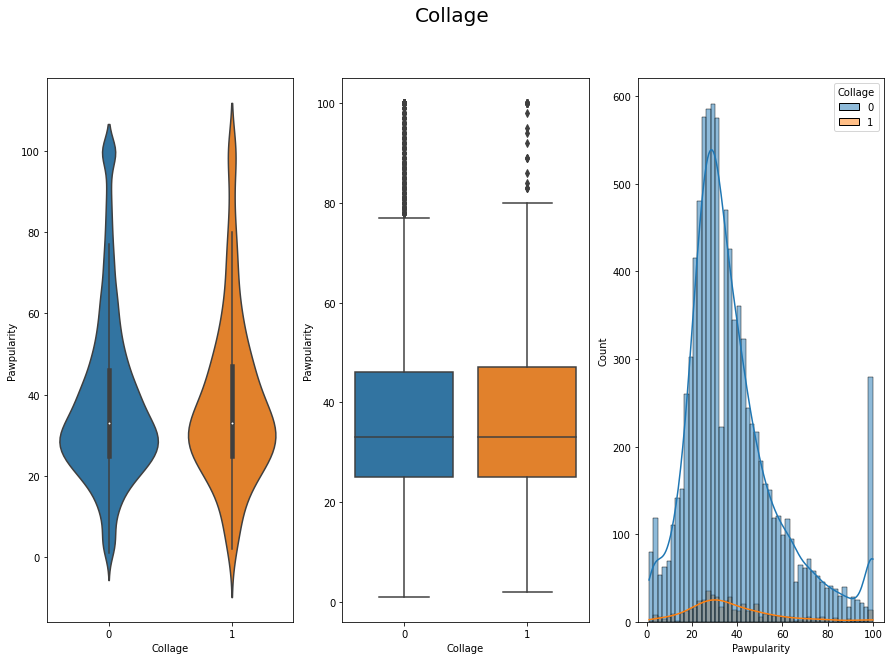

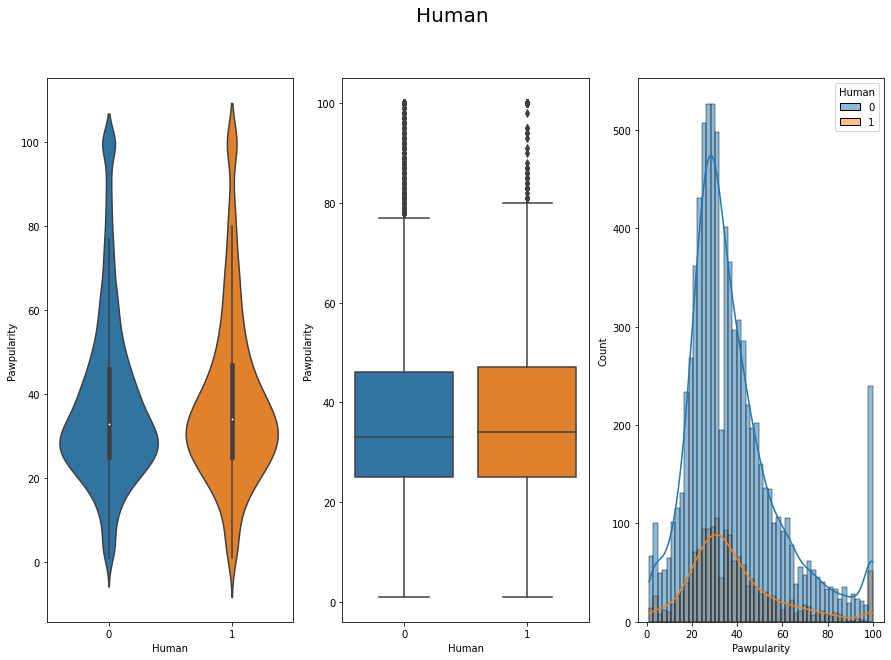

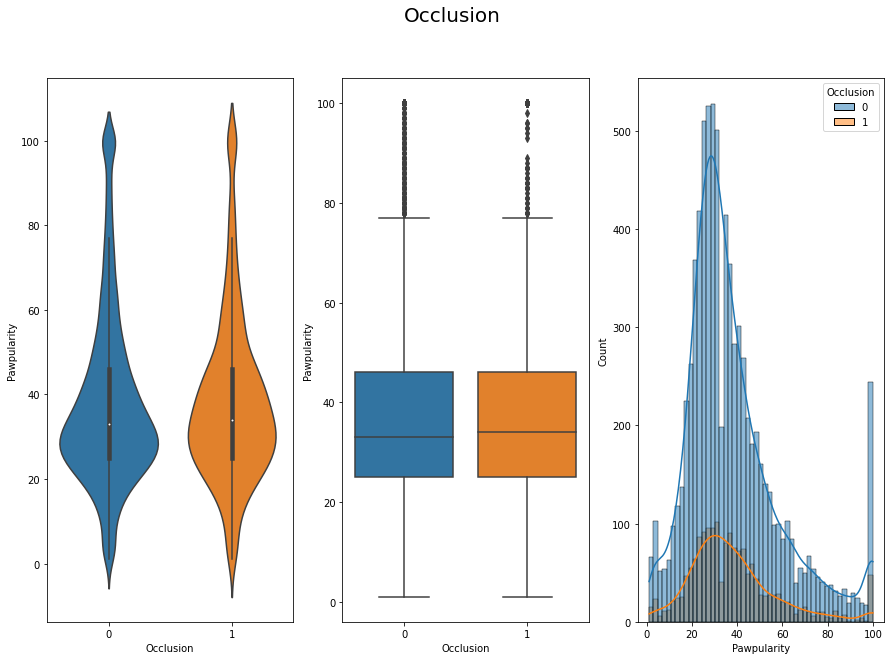

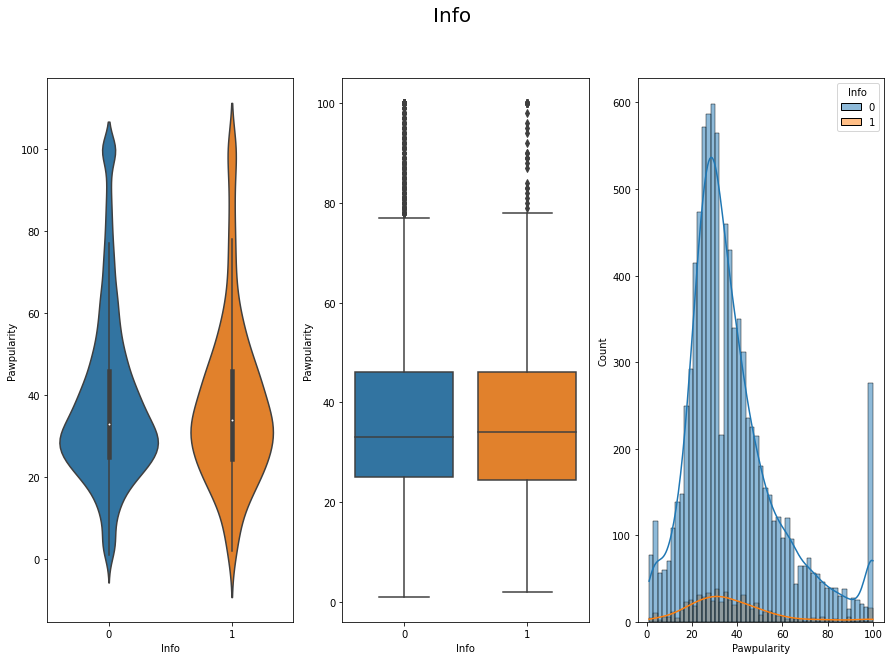

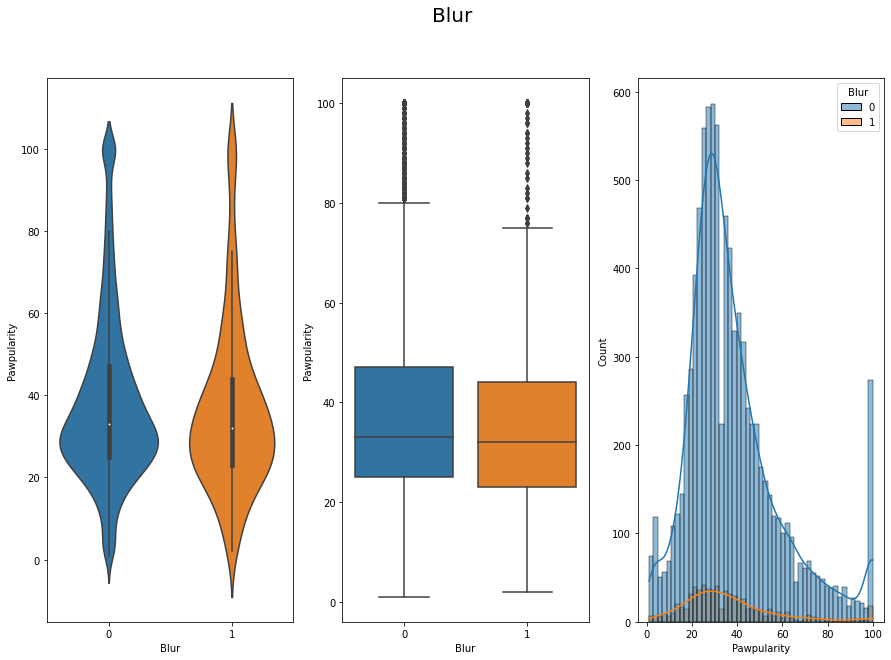

In [34]:
cols = [ 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']

for col in cols:
    fig, ax = plt.subplots(1, 3, figsize = (15, 10))
    sns.violinplot(data = train_df, y = 'Pawpularity', x = col, ax = ax[0])
    sns.boxplot(data = train_df, y = 'Pawpularity', x = col, ax = ax[1])    
    sns.histplot(data = train_df, x = 'Pawpularity', hue = col, kde = True, fill = True, ax = ax[2])
    
    plt.suptitle(str(col), fontsize = 20)

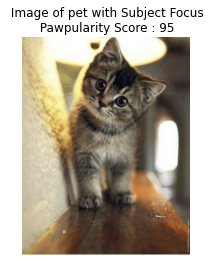

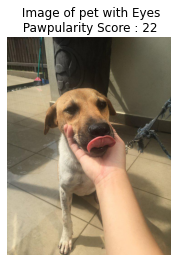

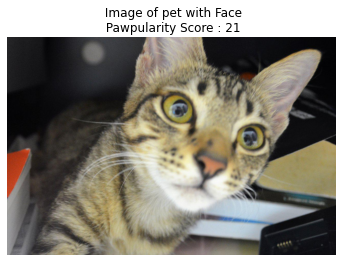

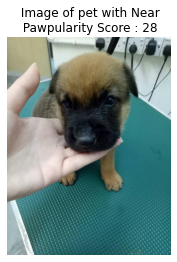

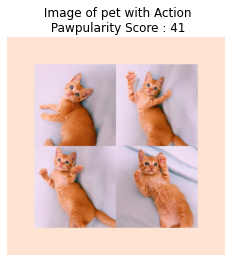

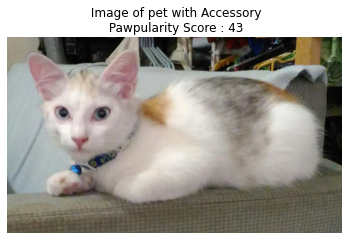

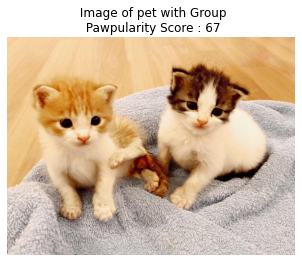

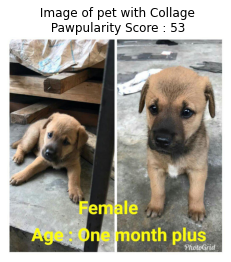

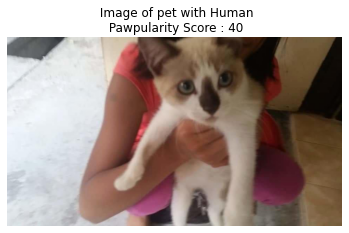

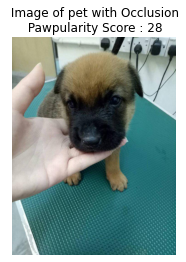

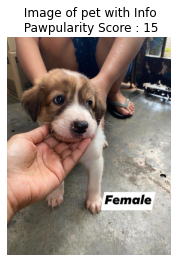

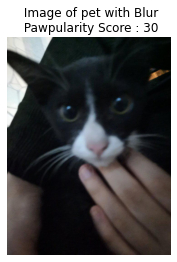

In [51]:
nums = len(cols)
# Check Image
img_path = './train/'
for count, col in enumerate(cols):
    sample = train_df.loc[train_df[col] == 1]['Id'].head(100).values[np.random.randint(10)]
    
    pawpularity = train_df.loc[train_df['Id'] == sample]['Pawpularity'].head(1).values[-1]
#     print(pawpularity)
    image_loc = img_path + sample + '.jpg'
    image_array = plt.imread(image_loc)
    plt.imshow(image_array)
    plt.title(f' Image of pet with {col}\n Pawpularity Score : {pawpularity}')
    plt.axis('off')
    plt.show()

In [52]:
train = pd.read_csv('./train.csv')
train = train.drop(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],axis=1)

test = pd.read_csv('./test.csv')
test = test.drop(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],axis=1)

In [53]:
# Train_data 연결
def train_id_jpg(x):
    img_path = './train/'
    return img_path + x + '.jpg'
# Test_data 연결
def test_id_jpg(x):
    img_path = './test/'
    return img_path + x + '.jpg'

In [58]:
train['img_path'] = train['Id'].apply(lambda x : train_id_jpg(x))
test['img_path'] = test['Id'].apply(lambda x : test_id_jpg(x))

train.head()
test.head()

,Id,img_path
0,4128bae22183829d2b5fea10effdb0c3,./test/4128bae22183829d2b5fea10effdb0c3.jpg
1,43a2262d7738e3d420d453815151079e,./test/43a2262d7738e3d420d453815151079e.jpg
2,4e429cead1848a298432a0acad014c9d,./test/4e429cead1848a298432a0acad014c9d.jpg
3,80bc3ccafcc51b66303c2c263aa38486,./test/80bc3ccafcc51b66303c2c263aa38486.jpg
4,8f49844c382931444e68dffbe20228f4,./test/8f49844c382931444e68dffbe20228f4.jpg


In [59]:
#binning columns to test models
train['two_bin_pawp'] = pd.qcut(train['Pawpularity'], q=2, labels=False)
train = train.astype({"two_bin_pawp": str})

train['four_bin_pawp'] = pd.qcut(train['Pawpularity'], q=4, labels=False)
train = train.astype({"four_bin_pawp": str})

train['ten_bin_pawp'] = pd.qcut(train['Pawpularity'], q=10, labels=False)
train = train.astype({"ten_bin_pawp": str})

In [60]:
train.head()

,Id,Pawpularity,img_path,two_bin_pawp,four_bin_pawp,ten_bin_pawp
0,0007de18844b0dbbb5e1f607da0606e0,63,./train/0007de18844b0dbbb5e1f607da0606e0.jpg,1,3,8
1,0009c66b9439883ba2750fb825e1d7db,42,./train/0009c66b9439883ba2750fb825e1d7db.jpg,1,2,6
2,0013fd999caf9a3efe1352ca1b0d937e,28,./train/0013fd999caf9a3efe1352ca1b0d937e.jpg,0,1,3
3,0018df346ac9c1d8413cfcc888ca8246,15,./train/0018df346ac9c1d8413cfcc888ca8246.jpg,0,0,0
4,001dc955e10590d3ca4673f034feeef2,72,./train/001dc955e10590d3ca4673f034feeef2.jpg,1,3,9


In [76]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

image_height = 128
image_width = 128

def to_tensor(frame, img_size = (128, 128, 3)):
    images_path = frame['img_path'].tolist()
    datasize = len(images_path)
    
    image_array = np.zeros([datasize, img_size[0], img_size[1], img_size[2]], dtype = np.float32)
    
    for i in tqdm(range(datasize)):
        img_pixels = load_img(images_path[i], target_size = img_size) 
        image_array[i] = img_pixels
    
    print('Img_array Shape: ', image_array.shape, 'Img_len :', len(image_array))
    
    return image_array

In [77]:
train_img = to_tensor(train)

100%|█████████████████████████████████████████████████████████████████████████████| 9912/9912 [00:54<00:00, 183.33it/s]

Img_array Shape:  (9912, 128, 128, 3) Img_len : 9912


In [78]:
test_img = to_tensor(test)

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 399.54it/s]

Img_array Shape:  (8, 128, 128, 3) Img_len : 8


In [79]:
y = train['Pawpularity']
print(type(y))

<class 'pandas.core.series.Series'>


In [80]:
len(y)

9912

In [87]:
from sklearn.model_selection import train_test_split

train_data, test_data , train_label, test_label = train_test_split(train_img, y, test_size = 0.1, random_state = 256)

print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)
# print('X_train.shape :', X_train.shape,'Y_train :',Y_train.shape, 'X_test.shape :', X_test.shape,  'Y_test :', Y_test.shape)

(8920, 128, 128, 3) (8920,) (992, 128, 128, 3) (992,)


In [82]:
#modeling
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
def get_model(SEED=42):
    tf.keras.backend.clear_session()
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    
    input_ = keras.Input(shape=(128,128,3))

    x = keras.layers.Conv2D(filters = 16, kernel_size=[7,7], strides=[2,2], padding='valid', kernel_initializer='he_normal',
                           kernel_regularizer=l2(0.0005), activation = 'relu')(input_)

    x = keras.layers.Conv2D(filters = 32, kernel_size=[3,3], padding='same', kernel_initializer='he_normal',
                           activation = 'relu')(x)

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Conv2D(filters = 32, kernel_size=[3,3],strides=[2,2], padding='same', kernel_initializer='he_normal',
                           activation = 'relu', kernel_regularizer=l2(0.0005))(x)

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dropout(0.25)(x)

    x = keras.layers.Conv2D(filters = 64, kernel_size=[3,3], padding='same', kernel_initializer='he_normal', activation='relu'
                            ,kernel_regularizer=l2(0.0002))(x)

    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same',
                               kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)

    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dropout(0.25)(x)

    #####
    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)

    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)

    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Dropout(0.25)(x)

    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(512, activation = "relu")(x)

    x = tf.keras.layers.Dropout(0.5)(x)

    output = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs = input_, outputs = output)
    
    return model

In [85]:
model = get_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 16)        2368      
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization (BatchN  (None, 61, 61, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 31, 31, 32)       128       
 hNormalization)                                             

In [91]:
model.compile(loss = 'mse', optimizer = 'Adam', metrics = [tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])

data_augmentator = ImageDataGenerator(rotation_range = 15, 
                                      zoom_range = 0.15, 
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      shear_range = 0.1,
                                      horizontal_flip= True,
                                      fill_mode = 'nearest')

els_cb = tf.keras.callbacks.EarlyStopping(monitor = 'val_rmse', patience = 10, restore_best_weights = True)
# X_train, X_test, Y_train, Y_test
# train_data, test_data , train_label, test_label
history = model.fit(
    data_augmentator.flow(train_data, train_label, batch_size = 64),
    validation_data = (test_data, test_label),
    epochs = 50, callbacks = [els_cb],
    verbose = 1
)

Epoch 1/50
140/140 [==============================] - 23s 119ms/step - loss: 497.2300 - rmse: 22.2931 - val_loss: 512.9450 - val_rmse: 22.6428
Epoch 2/50
140/140 [==============================] - 16s 117ms/step - loss: 471.4494 - rmse: 21.7071 - val_loss: 414.2251 - val_rmse: 20.3463
Epoch 3/50
140/140 [==============================] - 16s 117ms/step - loss: 464.1370 - rmse: 21.5379 - val_loss: 443.7751 - val_rmse: 21.0599
Epoch 4/50
140/140 [==============================] - 16s 117ms/step - loss: 461.4618 - rmse: 21.4757 - val_loss: 437.4542 - val_rmse: 20.9092
Epoch 5/50
140/140 [==============================] - 16s 117ms/step - loss: 461.4955 - rmse: 21.4764 - val_loss: 433.0336 - val_rmse: 20.8032
Epoch 6/50
140/140 [==============================] - 16s 117ms/step - loss: 456.6057 - rmse: 21.3622 - val_loss: 587.8096 - val_rmse: 24.2393
Epoch 7/50
140/140 [==============================] - 16s 117ms/step - loss: 461.0434 - rmse: 21.4657 - val_loss: 411.3277 - val_rmse: 20.2746

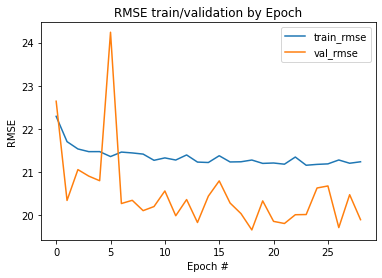

In [92]:
plt.figure()
plt.plot(history.history["rmse"], label="train_rmse")
plt.plot(history.history["val_rmse"], label="val_rmse")
plt.title("RMSE train/validation by Epoch")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="upper right");

In [93]:
pred = model.predict(test_img)
submiv = pd.DataFrame()
submiv['Id'] = test['Id']
submiv['Pawpularity'] = pred
submiv.to_csv('submission.csv', index = False)

1/1 [==============================] - 0s 168ms/step
